## Analysis for WomenTechWomenYes (WTWY) annual gala

- The goal of this analysis is to give the WomenTechWomenYes (WTWY) more information about the top five traffic subway stations in New York City by using MTA Turnstile data, so they can determine which stations are the busiest for their street teams to collect most email addresses and people who sing up are sent free tickets to attend the WTWY summer gala event.



- The placement of street teams at busiest to subway stations will be determined according to MTA data analysis.

>**First,** I will do cleaning and importing data from http://web.mta.info/developers/turnstile.html

# Data Sourcing and Cleaning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math 
import random
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [150502,150509,150516,150523, 150530, 150606,150613, 150620, 150627, 150704, 150711,150718,150725]
turnstiles_df = get_data(week_nums)

In [3]:
turnstiles_df.to_csv('MTA_DATA.csv')

In [4]:
turnstiles_df.shape

(2496565, 11)

In [5]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,00:00:00,REGULAR,5106770,1729635
1,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,04:00:00,REGULAR,5106810,1729649
2,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,08:00:00,REGULAR,5106835,1729680
3,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,12:00:00,REGULAR,5106961,1729784
4,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,16:00:00,REGULAR,5107250,1729858


In [6]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [7]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

In [8]:
turnstiles_df.to_sql('TD_t', con=engine)

In [9]:
mta = pd.read_sql('SELECT * FROM TD_t;', engine)
mta

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,0,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,00:00:00,REGULAR,5106770,1729635
1,1,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,04:00:00,REGULAR,5106810,1729649
2,2,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,08:00:00,REGULAR,5106835,1729680
3,3,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,12:00:00,REGULAR,5106961,1729784
4,4,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,16:00:00,REGULAR,5107250,1729858
...,...,...,...,...,...,...,...,...,...,...,...,...
2496560,192886,TRAM1,R468,00-05-00,RIT-MANHATTAN,R,RIT,07/24/2015,05:00:00,REGULAR,1106,0
2496561,192887,TRAM1,R468,00-05-00,RIT-MANHATTAN,R,RIT,07/24/2015,09:00:00,REGULAR,1106,0
2496562,192888,TRAM1,R468,00-05-00,RIT-MANHATTAN,R,RIT,07/24/2015,13:00:00,REGULAR,1106,0
2496563,192889,TRAM1,R468,00-05-00,RIT-MANHATTAN,R,RIT,07/24/2015,17:00:00,REGULAR,1107,0


In [10]:
# Take the date and time fields into a single datetime column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [11]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,00:00:00,REGULAR,5106770,1729635,2015-04-25 00:00:00
1,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,04:00:00,REGULAR,5106810,1729649,2015-04-25 04:00:00
2,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,08:00:00,REGULAR,5106835,1729680,2015-04-25 08:00:00
3,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,12:00:00,REGULAR,5106961,1729784,2015-04-25 12:00:00
4,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,16:00:00,REGULAR,5107250,1729858,2015-04-25 16:00:00


# Data Cleaning


In [55]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(20)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,LEXINGTON AVE,2015-04-25 00:00:00,1
1664369,R147,R033,04-00-05,42 ST-TIMES SQ,2015-07-14 20:00:00,1
1664362,R147,R033,04-00-05,42 ST-TIMES SQ,2015-07-13 16:00:00,1
1664363,R147,R033,04-00-05,42 ST-TIMES SQ,2015-07-13 20:00:00,1
1664364,R147,R033,04-00-05,42 ST-TIMES SQ,2015-07-14 00:00:00,1
1664365,R147,R033,04-00-05,42 ST-TIMES SQ,2015-07-14 04:00:00,1
1664366,R147,R033,04-00-05,42 ST-TIMES SQ,2015-07-14 08:00:00,1
1664367,R147,R033,04-00-05,42 ST-TIMES SQ,2015-07-14 12:00:00,1
1664368,R147,R033,04-00-05,42 ST-TIMES SQ,2015-07-14 16:00:00,1
1664370,R147,R033,04-00-05,42 ST-TIMES SQ,2015-07-15 00:00:00,1


In [13]:
# Get rid of the duplicate entry
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)



In [14]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(10)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,LEXINGTON AVE,2015-04-25 00:00:00,1
1664369,R147,R033,04-00-05,42 ST-TIMES SQ,2015-07-14 20:00:00,1
1664362,R147,R033,04-00-05,42 ST-TIMES SQ,2015-07-13 16:00:00,1
1664363,R147,R033,04-00-05,42 ST-TIMES SQ,2015-07-13 20:00:00,1
1664364,R147,R033,04-00-05,42 ST-TIMES SQ,2015-07-14 00:00:00,1
1664365,R147,R033,04-00-05,42 ST-TIMES SQ,2015-07-14 04:00:00,1
1664366,R147,R033,04-00-05,42 ST-TIMES SQ,2015-07-14 08:00:00,1
1664367,R147,R033,04-00-05,42 ST-TIMES SQ,2015-07-14 12:00:00,1
1664368,R147,R033,04-00-05,42 ST-TIMES SQ,2015-07-14 16:00:00,1
1664370,R147,R033,04-00-05,42 ST-TIMES SQ,2015-07-15 00:00:00,1


In [15]:
turnstiles_df.isna().sum()

C/A          0
UNIT         0
SCP          0
STATION      0
LINENAME     0
DIVISION     0
DATE         0
TIME         0
DESC         0
ENTRIES      0
EXITS        0
DATE_TIME    0
dtype: int64

In [16]:
turnstiles_df.shape

(2496549, 12)

In [17]:
turnstiles_daily_entries = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())
turnstiles_daily_entries

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,LEXINGTON AVE,04/25/2015,5107620
1,A002,R051,02-00-00,LEXINGTON AVE,04/26/2015,5108367
2,A002,R051,02-00-00,LEXINGTON AVE,04/27/2015,5110015
3,A002,R051,02-00-00,LEXINGTON AVE,04/28/2015,5111702
4,A002,R051,02-00-00,LEXINGTON AVE,04/29/2015,5113477
...,...,...,...,...,...,...
413971,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/04/2015,5554
413972,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/05/2015,5554
413973,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/06/2015,5554
413974,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/07/2015,5554


In [18]:
turnstiles_daily_entries[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily_entries
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

<ipython-input-18-9d1332f75763>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily_entries[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily_entries


In [19]:
turnstiles_daily_entries.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,LEXINGTON AVE,04/25/2015,5107620,NaN,NaN
1,A002,R051,02-00-00,LEXINGTON AVE,04/26/2015,5108367,04/25/2015,5107620.0
2,A002,R051,02-00-00,LEXINGTON AVE,04/27/2015,5110015,04/26/2015,5108367.0
3,A002,R051,02-00-00,LEXINGTON AVE,04/28/2015,5111702,04/27/2015,5110015.0
4,A002,R051,02-00-00,LEXINGTON AVE,04/29/2015,5113477,04/28/2015,5111702.0


In [20]:
turnstiles_daily_entries.tail()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
413971,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/04/2015,5554,07/03/2015,5554.0
413972,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/05/2015,5554,07/04/2015,5554.0
413973,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/06/2015,5554,07/05/2015,5554.0
413974,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/07/2015,5554,07/06/2015,5554.0
413975,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/08/2015,5554,07/07/2015,5554.0


In [21]:
# Drop the rows for the earliest date in the df
turnstiles_daily_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)
turnstiles_daily_entries.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,LEXINGTON AVE,04/26/2015,5108367,04/25/2015,5107620.0
2,A002,R051,02-00-00,LEXINGTON AVE,04/27/2015,5110015,04/26/2015,5108367.0
3,A002,R051,02-00-00,LEXINGTON AVE,04/28/2015,5111702,04/27/2015,5110015.0
4,A002,R051,02-00-00,LEXINGTON AVE,04/29/2015,5113477,04/28/2015,5111702.0
5,A002,R051,02-00-00,LEXINGTON AVE,04/30/2015,5115219,04/29/2015,5113477.0


In [22]:
turnstiles_daily_entries["STATION"][turnstiles_daily_entries["ENTRIES"] < turnstiles_daily_entries["PREV_ENTRIES"]]

3093       57 ST-7 AVE
3094       57 ST-7 AVE
3095       57 ST-7 AVE
3096       57 ST-7 AVE
3097       57 ST-7 AVE
              ...     
407889    FLATBUSH AVE
407890    FLATBUSH AVE
407891    FLATBUSH AVE
407892    FLATBUSH AVE
407893    FLATBUSH AVE
Name: STATION, Length: 2534, dtype: object

In [23]:
turnstiles_daily_entries[turnstiles_daily_entries["ENTRIES"] < turnstiles_daily_entries["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
3093,A011,R080,01-00-00,57 ST-7 AVE,04/26/2015,888987818,04/25/2015,888989480.0
3094,A011,R080,01-00-00,57 ST-7 AVE,04/27/2015,888984985,04/26/2015,888987818.0
3095,A011,R080,01-00-00,57 ST-7 AVE,04/28/2015,888981923,04/27/2015,888984985.0
3096,A011,R080,01-00-00,57 ST-7 AVE,04/29/2015,888978685,04/28/2015,888981923.0
3097,A011,R080,01-00-00,57 ST-7 AVE,04/30/2015,888975568,04/29/2015,888978685.0


In [24]:
turnstiles_daily_entries['STATION'].value_counts()

34 ST-PENN STA     8988
FULTON ST          8583
42 ST-GRD CNTRL    5580
CANAL ST           5215
34 ST-HERALD SQ    4860
                   ... 
DYCKMAN-200 ST      267
NEREID AVE          261
MONTROSE AVE        255
CLEVELAND ST        180
PATH WTC 2           90
Name: STATION, Length: 384, dtype: int64

In [25]:
# Let's see how many stations have this problem

(turnstiles_daily_entries[turnstiles_daily_entries["ENTRIES"] < turnstiles_daily_entries["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A   UNIT  SCP       STATION        
A011  R080  01-00-00  57 ST-7 AVE        90
            01-00-04  57 ST-7 AVE        90
            01-00-05  57 ST-7 AVE        90
A025  R023  01-03-02  34 ST-HERALD SQ    90
A049  R088  02-05-00  CORTLANDT ST       42
                                         ..
R622  R123  00-00-00  FRANKLIN AVE       90
R625  R062  01-06-00  CROWN HTS-UTICA     2
R645  R110  00-00-01  FLATBUSH AVE        1
            00-00-02  FLATBUSH AVE        1
R646  R110  01-00-01  FLATBUSH AVE       90
Length: 142, dtype: int64

In [26]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        return 0
    return counter
# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_daily_entries["DAILY_ENTRIES"] = turnstiles_daily_entries.apply(get_daily_counts, axis=1, max_counter=1000000)

117441088 4093959.0
83886713 4845044.0
369118405 1494599.0
1824 1502170.0
656 8909891.0
1796 1960232.0
604 2732815.0
394 2470659.0
258 2161656.0
196608 134676480.0
951650281 13466666.0
2771 5009339.0
1621 7691999.0
4316 3424448.0
117440512 0.0
167830669 668899.0
184584515 754561.0
1275106715 4983268.0
915 13592075.0
3459 2529922.0
3643 1345896.0
83933355 365752.0
2315 8554036.0
668 3986370.0
137101335 2118713385.0
2118713386 137101317.0
50331650 724.0
22 2894352.0
117440512 13.0
150994946 100663330.0
1541996590 830.0
1090865800 1541996594.0
156 7398339.0
2294290 3599887.0
1416 1283643.0
4264942 1004289.0
369145758 1490229.0
89 369249941.0
234971412 17702481.0
3 33554475.0
134217732 4.0
134219620 3916663.0
5 2044980.0
50331648 100663296.0
83948349 333038.0
201391859 840881.0
2530 2687274.0
503348781 1967402.0
892 1208464836.0
1884 1717949.0
1033 3105003.0
1157647580 4542792.0
527667456 1931476881.0
11123424 3184.0
172 3535111.0
1040247990 4091116.0
436233570 1704241.0
302018829 1179389.

In [27]:
turnstiles_daily_entries.size

3684537

In [28]:
turnstiles_daily_entries.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,LEXINGTON AVE,04/26/2015,5108367,04/25/2015,5107620.0,747.0
2,A002,R051,02-00-00,LEXINGTON AVE,04/27/2015,5110015,04/26/2015,5108367.0,1648.0
3,A002,R051,02-00-00,LEXINGTON AVE,04/28/2015,5111702,04/27/2015,5110015.0,1687.0
4,A002,R051,02-00-00,LEXINGTON AVE,04/29/2015,5113477,04/28/2015,5111702.0,1775.0
5,A002,R051,02-00-00,LEXINGTON AVE,04/30/2015,5115219,04/29/2015,5113477.0,1742.0


In [29]:
station_daily_entries = turnstiles_daily_entries.groupby(["C/A", "UNIT", "STATION", "DATE"])['DAILY_ENTRIES'].sum().reset_index()
station_daily_entries.head()



,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
0,A002,R051,LEXINGTON AVE,04/26/2015,9546.0
1,A002,R051,LEXINGTON AVE,04/27/2015,16820.0
2,A002,R051,LEXINGTON AVE,04/28/2015,17990.0
3,A002,R051,LEXINGTON AVE,04/29/2015,18273.0
4,A002,R051,LEXINGTON AVE,04/30/2015,18545.0


In [30]:
#grouping data by stations and data to find a sum of daily entries
station_daily_entries = \
(turnstiles_daily_entries.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum()
                 .reset_index())
station_daily_entries.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AVE,04/26/2015,11.0
1,1 AVE,04/27/2015,19127.0
2,1 AVE,04/28/2015,22576.0
3,1 AVE,04/29/2015,23716.0
4,1 AVE,04/30/2015,23850.0


In [31]:
# finding out the stations with the highest traffic during the time I investigate

station_totals = station_daily_entries.groupby('STATION').sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index()

station_totals.head()

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,14256169.0
1,42 ST-GRD CNTRL,11935125.0
2,34 ST-HERALD SQ,10010821.0
3,86 ST,9002861.0
4,14 ST-UNION SQ,8984814.0


In [32]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .EXITS.count()
 .reset_index()
 .sort_values("EXITS", ascending=False)).head()

,C/A,UNIT,SCP,STATION,DATE_TIME,EXITS
0,A002,R051,02-00-00,LEXINGTON AVE,2015-04-25 00:00:00,1
1664369,R147,R033,04-00-05,42 ST-TIMES SQ,2015-07-14 20:00:00,1
1664362,R147,R033,04-00-05,42 ST-TIMES SQ,2015-07-13 16:00:00,1
1664363,R147,R033,04-00-05,42 ST-TIMES SQ,2015-07-13 20:00:00,1
1664364,R147,R033,04-00-05,42 ST-TIMES SQ,2015-07-14 00:00:00,1


In [33]:
turnstiles_daily_exits = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .EXITS.first())
turnstiles_daily_exits

,C/A,UNIT,SCP,STATION,DATE,EXITS
0,A002,R051,02-00-00,LEXINGTON AVE,04/25/2015,1729914
1,A002,R051,02-00-00,LEXINGTON AVE,04/26/2015,1730193
2,A002,R051,02-00-00,LEXINGTON AVE,04/27/2015,1730829
3,A002,R051,02-00-00,LEXINGTON AVE,04/28/2015,1731428
4,A002,R051,02-00-00,LEXINGTON AVE,04/29/2015,1732007
...,...,...,...,...,...,...
413971,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/04/2015,216
413972,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/05/2015,216
413973,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/06/2015,216
413974,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/07/2015,216


In [34]:
turnstiles_daily_exits[["PREV_DATE", "PREV_EXITS"]] = (turnstiles_daily_exits
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "EXITS"]
                                                       .apply(lambda grp: grp.shift(1)))

<ipython-input-34-1abf788fe487>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily_exits[["PREV_DATE", "PREV_EXITS"]] = (turnstiles_daily_exits


In [35]:
turnstiles_daily_exits.head()

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS
0,A002,R051,02-00-00,LEXINGTON AVE,04/25/2015,1729914,NaN,NaN
1,A002,R051,02-00-00,LEXINGTON AVE,04/26/2015,1730193,04/25/2015,1729914.0
2,A002,R051,02-00-00,LEXINGTON AVE,04/27/2015,1730829,04/26/2015,1730193.0
3,A002,R051,02-00-00,LEXINGTON AVE,04/28/2015,1731428,04/27/2015,1730829.0
4,A002,R051,02-00-00,LEXINGTON AVE,04/29/2015,1732007,04/28/2015,1731428.0


In [36]:
# Drop the rows for the earliest date in the df
turnstiles_daily_exits.dropna(subset=["PREV_DATE"], axis=0, inplace=True)
turnstiles_daily_exits.head()

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS
1,A002,R051,02-00-00,LEXINGTON AVE,04/26/2015,1730193,04/25/2015,1729914.0
2,A002,R051,02-00-00,LEXINGTON AVE,04/27/2015,1730829,04/26/2015,1730193.0
3,A002,R051,02-00-00,LEXINGTON AVE,04/28/2015,1731428,04/27/2015,1730829.0
4,A002,R051,02-00-00,LEXINGTON AVE,04/29/2015,1732007,04/28/2015,1731428.0
5,A002,R051,02-00-00,LEXINGTON AVE,04/30/2015,1732362,04/29/2015,1732007.0


In [37]:
turnstiles_daily_exits["STATION"][turnstiles_daily_exits["EXITS"] < turnstiles_daily_exits["PREV_EXITS"]]

2115       5 AVE-59 ST
3093       57 ST-7 AVE
3094       57 ST-7 AVE
3095       57 ST-7 AVE
3096       57 ST-7 AVE
              ...     
407889    FLATBUSH AVE
407890    FLATBUSH AVE
407891    FLATBUSH AVE
407892    FLATBUSH AVE
407893    FLATBUSH AVE
Name: STATION, Length: 2063, dtype: object

In [38]:
turnstiles_daily_exits["STATION"][turnstiles_daily_exits["EXITS"] < turnstiles_daily_exits["PREV_EXITS"]].head

<bound method NDFrame.head of 2115       5 AVE-59 ST
3093       57 ST-7 AVE
3094       57 ST-7 AVE
3095       57 ST-7 AVE
3096       57 ST-7 AVE
              ...     
407889    FLATBUSH AVE
407890    FLATBUSH AVE
407891    FLATBUSH AVE
407892    FLATBUSH AVE
407893    FLATBUSH AVE
Name: STATION, Length: 2063, dtype: object>

In [39]:
turnstiles_daily_exits['STATION'].value_counts()

34 ST-PENN STA     8988
FULTON ST          8583
42 ST-GRD CNTRL    5580
CANAL ST           5215
34 ST-HERALD SQ    4860
                   ... 
DYCKMAN-200 ST      267
NEREID AVE          261
MONTROSE AVE        255
CLEVELAND ST        180
PATH WTC 2           90
Name: STATION, Length: 384, dtype: int64

In [40]:
(turnstiles_daily_exits[turnstiles_daily_exits["EXITS"] < turnstiles_daily_exits["PREV_EXITS"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A   UNIT  SCP       STATION        
A007  R079  01-06-01  5 AVE-59 ST         1
A011  R080  01-00-00  57 ST-7 AVE        90
            01-00-03  57 ST-7 AVE        90
            01-00-04  57 ST-7 AVE        90
            01-00-05  57 ST-7 AVE        90
                                         ..
R622  R123  00-00-00  FRANKLIN AVE       90
R625  R062  01-06-00  CROWN HTS-UTICA     2
R645  R110  00-00-01  FLATBUSH AVE        1
            00-00-02  FLATBUSH AVE        1
R646  R110  01-00-01  FLATBUSH AVE       90
Length: 141, dtype: int64

In [41]:
def get_daily_counts(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["EXITS"], row["PREV_EXITS"])
        counter = min(row["EXITS"], row["PREV_EXITS"])
    if counter > max_counter:
        return 0
    return counter
turnstiles_daily_exits["DAILY_EXITS"] = turnstiles_daily_exits.apply(get_daily_counts, axis=1, max_counter=1000000)

409 7136948.0
456 6188320.0
11720626 511635.0
514129 11720626.0
452999492 1788958.0
48 2131371.0
1683 5748659.0
0 7645885.0
349 2965148.0
604 1617267.0
255 1334497.0
996475845 11113817.0
414 1713188.0
1068 5009222.0
700 4203186.0
167831851 658070.0
218166236 912736.0
1627385609 10448482.0
256 7231775.0
369151312 1458124.0
12 4331026.0
224 2726620.0
1551695851 1565786090.0
1565786088 1551695871.0
16777216 0.0
142 1397877.0
725286840 0.0
1543778589 725286840.0
198 5465216.0
1650 2532416.0
335582950 1313107.0
210 335668523.0
1409220550 11317005.0
349 2909200.0
2261 2077281.0
174 1294962.0
1111564 69201.0
69614 1111564.0
33554436 32.0
33620374 149167.0
738200926 2946649.0
369513186 102104657.0
2682 1089707.0
616 1103467.0
536892362 2150786.0
1124 1376238497.0
509 1102212.0
592 1211906.0
1795 5714697.0
234920070 979323.0
1762911227 325713638.0
738171056 13909194.0
536900111 2134170.0
234896872 982403.0
37584828 1023543419.0
1241538585 568967.0
37 2846176.0
302185501 297681069.0
1532 2377336

In [42]:
turnstiles_daily_exits.head()

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS,DAILY_EXITS
1,A002,R051,02-00-00,LEXINGTON AVE,04/26/2015,1730193,04/25/2015,1729914.0,279.0
2,A002,R051,02-00-00,LEXINGTON AVE,04/27/2015,1730829,04/26/2015,1730193.0,636.0
3,A002,R051,02-00-00,LEXINGTON AVE,04/28/2015,1731428,04/27/2015,1730829.0,599.0
4,A002,R051,02-00-00,LEXINGTON AVE,04/29/2015,1732007,04/28/2015,1731428.0,579.0
5,A002,R051,02-00-00,LEXINGTON AVE,04/30/2015,1732362,04/29/2015,1732007.0,355.0


In [43]:
station_daily_exits = turnstiles_daily_exits.groupby(["C/A", "UNIT", "STATION", "DATE"])['DAILY_EXITS'].sum().reset_index()
station_daily_exits.head()

,C/A,UNIT,STATION,DATE,DAILY_EXITS
0,A002,R051,LEXINGTON AVE,04/26/2015,6325.0
1,A002,R051,LEXINGTON AVE,04/27/2015,10915.0
2,A002,R051,LEXINGTON AVE,04/28/2015,10810.0
3,A002,R051,LEXINGTON AVE,04/29/2015,11208.0
4,A002,R051,LEXINGTON AVE,04/30/2015,11194.0


In [44]:
#grouping data by stations and data to find a sum of daily exits
station_daily_exits = \
(turnstiles_daily_exits.groupby(["STATION", "DATE"])[['DAILY_EXITS']].sum()
                 .reset_index())
station_daily_exits.head()

,STATION,DATE,DAILY_EXITS
0,1 AVE,04/26/2015,294.0
1,1 AVE,04/27/2015,20131.0
2,1 AVE,04/28/2015,23697.0
3,1 AVE,04/29/2015,23699.0
4,1 AVE,04/30/2015,24740.0


In [45]:
station_totals = station_daily_exits.groupby('STATION').sum()\
    .sort_values('DAILY_EXITS', ascending=False)\
    .reset_index()

station_totals.head()

,STATION,DAILY_EXITS
0,34 ST-PENN STA,13001747.0
1,42 ST-GRD CNTRL,11506658.0
2,14 ST-UNION SQ,9024592.0
3,34 ST-HERALD SQ,8924216.0
4,42 ST-TIMES SQ,7661345.0


#### Calculating DAILY TRAFFIC by adding the turnstiles daily entries and turnstiles daily exits

In [46]:
turnstiles_df['DAILY_TRAFFIC'] = (turnstiles_daily_entries['DAILY_ENTRIES'] + turnstiles_daily_exits['DAILY_EXITS'])

In [47]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAILY_TRAFFIC
191032,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/08/2015,05:00:00,REGULAR,5554,216,2015-07-08 05:00:00,1118.0
191031,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/08/2015,01:00:00,REGULAR,5554,216,2015-07-08 01:00:00,1375.0
191030,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/07/2015,21:00:00,REGULAR,5554,216,2015-07-07 21:00:00,1672.0
191029,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/07/2015,17:00:00,REGULAR,5554,216,2015-07-07 17:00:00,1675.0
191028,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/07/2015,13:00:00,REGULAR,5554,216,2015-07-07 13:00:00,1662.0


In [48]:
#grouping the same data above by stations to find of a sum of daily entires and exists for top 5 stations
top5_stations = (turnstiles_df.groupby(['STATION'])['DAILY_TRAFFIC'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_TRAFFIC',ascending=False) 
                   .STATION.head())
top5_stations

231          FULTON ST
175           CANAL ST
67      34 ST-PENN STA
180        CHAMBERS ST
66     34 ST-HERALD SQ
Name: STATION, dtype: object

In [49]:
top5_stations_traffic = \
     turnstiles_df[turnstiles_df['STATION'].isin(top5_stations)].sort_values(by='DAILY_TRAFFIC',ascending=False)
top5_stations_traffic.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAILY_TRAFFIC
96262,N507,R023,00-03-06,34 ST-HERALD SQ,BDFMNQR,IND,06/18/2015,13:08:35,REGULAR,4444109,128054,2015-06-18 13:08:35,1667297.0
96172,N507,R023,00-03-05,34 ST-HERALD SQ,BDFMNQR,IND,06/15/2015,04:00:00,REGULAR,19585692,1369241,2015-06-15 04:00:00,1326969.0
56228,N091,R029,02-00-05,CHAMBERS ST,ACE23,IND,05/18/2015,08:00:00,REGULAR,11264167,9773807,2015-05-18 08:00:00,914509.0
56228,N091,R029,02-00-03,CHAMBERS ST,ACE23,IND,06/05/2015,12:00:00,REGULAR,5548677,5574321,2015-06-05 12:00:00,914509.0
56228,N089,R139,00-04-02,CANAL ST,ACE,IND,06/19/2015,12:00:00,REGULAR,4637898,1980718,2015-06-19 12:00:00,914509.0


# Plot

Text(0.5, 1.0, 'Top 5 busiest stations')

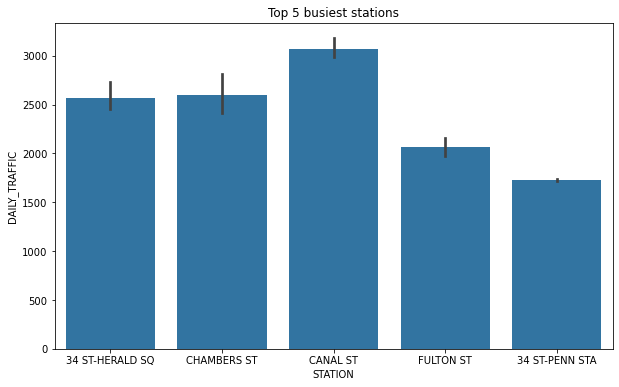

In [50]:
plt.figure(figsize=(10,6))
base_color = sns.color_palette()[0]
sns.barplot(data=top5_stations_traffic, x ='STATION',y = 'DAILY_TRAFFIC',color=base_color)
plt.title('Top 5 busiest stations')

- *Observations:*

- The figure above represents top 5 busiest stations in NYC. 

- The busiest station in NYC is CANAL ST STATION. 

### Finding daily traffic in CANAL STATION by number of weekdays

In [51]:
top5_stations_traffic = top5_stations_traffic[top5_stations_traffic['STATION'] == 'CANAL ST']
top5_stations_traffic.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAILY_TRAFFIC
56228,N089,R139,00-04-02,CANAL ST,ACE,IND,06/19/2015,12:00:00,REGULAR,4637898,1980718,2015-06-19 12:00:00,914509.0
56228,N090,R139,01-03-00,CANAL ST,ACE,IND,06/24/2015,00:00:00,REGULAR,6038216,1410288,2015-06-24 00:00:00,914509.0
56228,N090,R139,01-03-00,CANAL ST,ACE,IND,05/11/2015,20:00:00,REGULAR,5923233,1385912,2015-05-11 20:00:00,914509.0
54944,N089,R139,00-04-00,CANAL ST,ACE,IND,07/13/2015,04:00:00,REGULAR,1545211,27991,2015-07-13 04:00:00,55544.0
54944,N089,R139,00-00-01,CANAL ST,ACE,IND,07/04/2015,00:00:00,REGULAR,2549318,3384410,2015-07-04 00:00:00,55544.0


In [52]:
top5_stations_traffic['WEEK'] = pd.to_datetime(top5_stations_traffic['DATE']).dt.week
top5_stations_traffic.head()

<ipython-input-52-a056a1a32618>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  top5_stations_traffic['WEEK'] = pd.to_datetime(top5_stations_traffic['DATE']).dt.week


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAILY_TRAFFIC,WEEK
56228,N089,R139,00-04-02,CANAL ST,ACE,IND,06/19/2015,12:00:00,REGULAR,4637898,1980718,2015-06-19 12:00:00,914509.0,25
56228,N090,R139,01-03-00,CANAL ST,ACE,IND,06/24/2015,00:00:00,REGULAR,6038216,1410288,2015-06-24 00:00:00,914509.0,26
56228,N090,R139,01-03-00,CANAL ST,ACE,IND,05/11/2015,20:00:00,REGULAR,5923233,1385912,2015-05-11 20:00:00,914509.0,20
54944,N089,R139,00-04-00,CANAL ST,ACE,IND,07/13/2015,04:00:00,REGULAR,1545211,27991,2015-07-13 04:00:00,55544.0,29
54944,N089,R139,00-00-01,CANAL ST,ACE,IND,07/04/2015,00:00:00,REGULAR,2549318,3384410,2015-07-04 00:00:00,55544.0,27


In [53]:
top5_stations_traffic['DAY_OF_WEEK_NUM'] = pd.to_datetime(top5_stations_traffic['DATE']).dt.dayofweek
top5_stations_traffic['WEEK_OF_YEAR'] = pd.to_datetime(top5_stations_traffic['DATE']).dt.week
top5_stations_traffic.head()

<ipython-input-53-e4e521953fca>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  top5_stations_traffic['WEEK_OF_YEAR'] = pd.to_datetime(top5_stations_traffic['DATE']).dt.week


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAILY_TRAFFIC,WEEK,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
56228,N089,R139,00-04-02,CANAL ST,ACE,IND,06/19/2015,12:00:00,REGULAR,4637898,1980718,2015-06-19 12:00:00,914509.0,25,4,25
56228,N090,R139,01-03-00,CANAL ST,ACE,IND,06/24/2015,00:00:00,REGULAR,6038216,1410288,2015-06-24 00:00:00,914509.0,26,2,26
56228,N090,R139,01-03-00,CANAL ST,ACE,IND,05/11/2015,20:00:00,REGULAR,5923233,1385912,2015-05-11 20:00:00,914509.0,20,0,20
54944,N089,R139,00-04-00,CANAL ST,ACE,IND,07/13/2015,04:00:00,REGULAR,1545211,27991,2015-07-13 04:00:00,55544.0,29,0,29
54944,N089,R139,00-00-01,CANAL ST,ACE,IND,07/04/2015,00:00:00,REGULAR,2549318,3384410,2015-07-04 00:00:00,55544.0,27,5,27


# plot

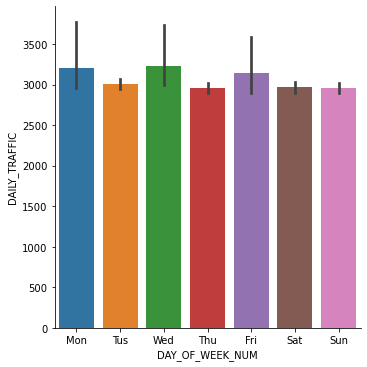

In [62]:
top1 = top5_stations_traffic[top5_stations_traffic.STATION == 'CANAL ST']
sns.catplot(x="DAY_OF_WEEK_NUM", y='DAILY_TRAFFIC', kind="bar",  data=top1)
plt.xticks([0,1,2,3,4,5,6],['Mon','Tus','Wed','Thu','Fri', 'Sat', 'Sun']);

- Street team should be placed at the busiest stations especially at CANAL ST 